PEDIMOS LA VARIABLE A GRAFICAR Y LOS DATOS A LOS CUALES QUEREMOS ACCEDER

In [16]:
variable = 'Voltaje_fase_1'
carpeta = 'Datos_generales_csv'

In [17]:
import pandas as pd


df= pd.read_csv(f"{carpeta}/{variable}.csv")
df.columns = ['fecha', f"{variable}"]



print(df.head())

                  fecha  Voltaje_fase_1
0  2024-09-25 15-00-0.3      123.615669
1  2024-09-25 15-00-1.1      123.521889
2  2024-09-25 15-00-1.9      123.417397
3  2024-09-25 15-00-2.7      123.417397
4  2024-09-25 15-00-3.5      123.439690


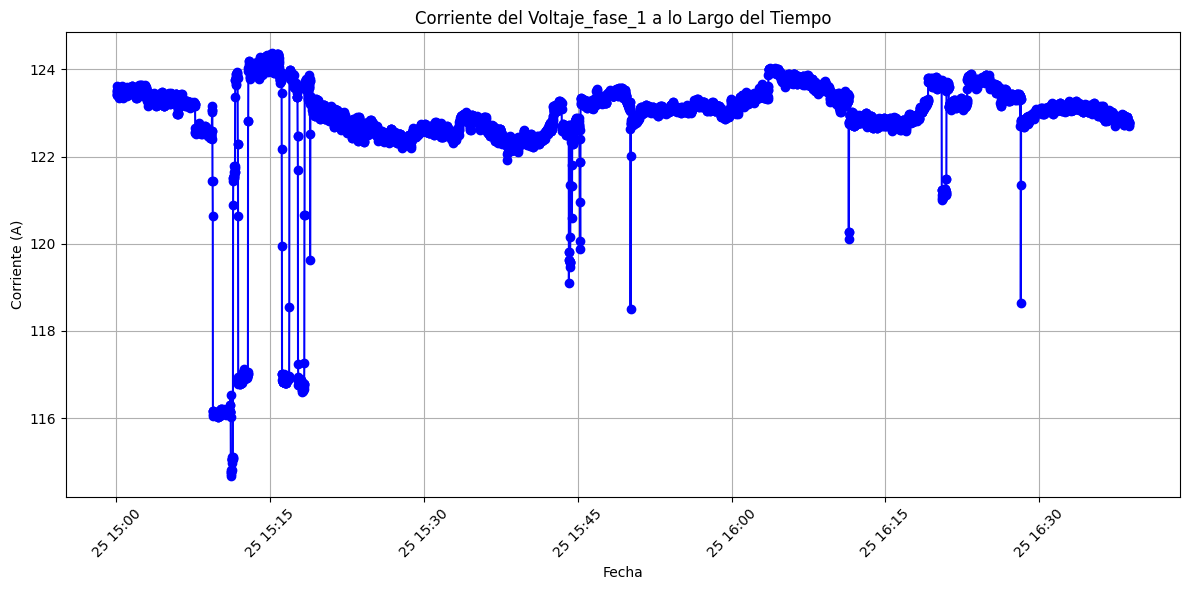

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo CSV (ajusta la ruta si es necesario)
data = pd.read_csv(f"{carpeta}/{variable}.csv")

if not isinstance(data['fecha'], pd.DatetimeIndex):
    data['fecha'] = pd.to_datetime(data['fecha'], format='%Y-%m-%d %H-%M-%S.%f', errors='coerce')
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(data['fecha'], data['Corriente_linea1'], marker='o', linestyle='-', color='b')
plt.title(f"Corriente del {variable} a lo Largo del Tiempo")
plt.xlabel('Fecha')
plt.ylabel('Corriente (A)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Mostrar la gráfica
plt.show()


OBSERVACIÓN VARIADAS DE VARIAS CORRIENTES AL MISMO TIEMPO

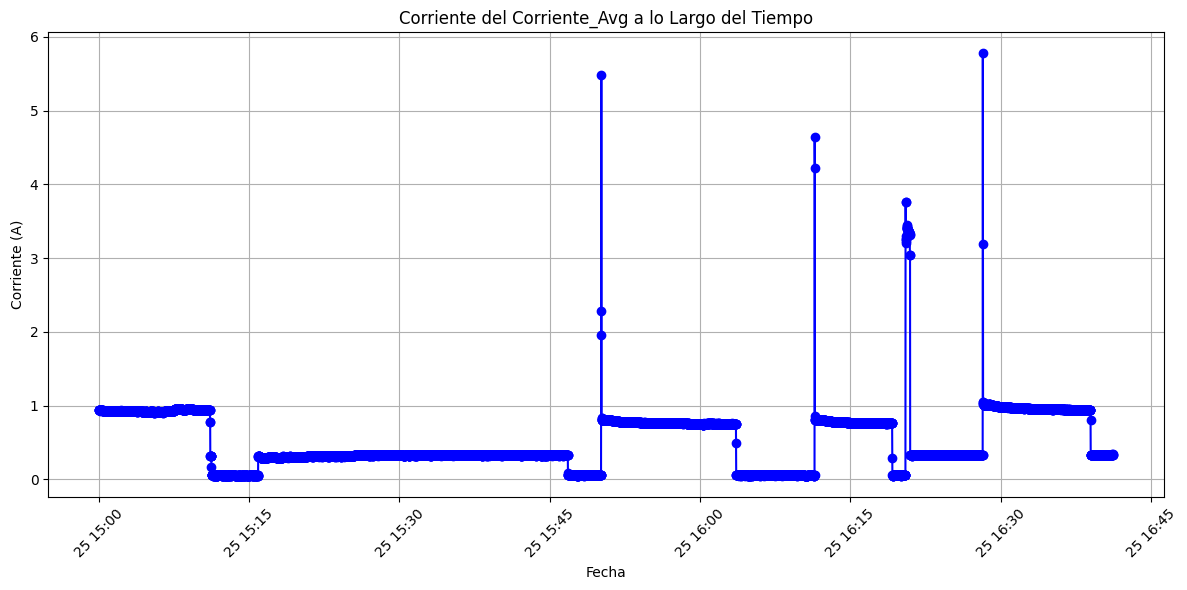

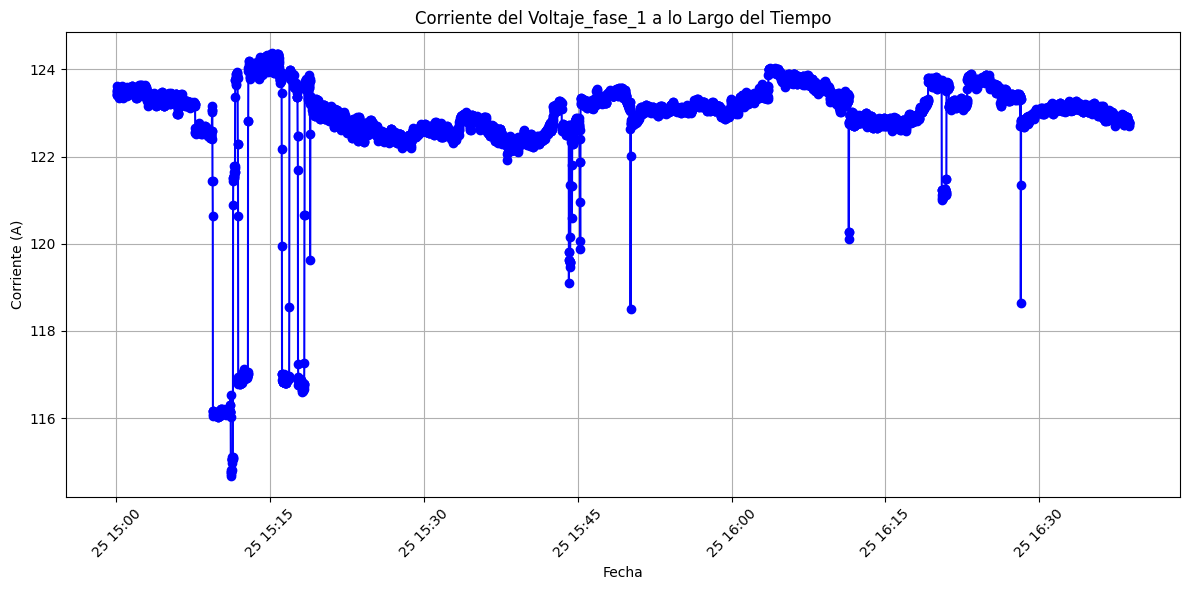

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox

# Carpeta fija
carpeta = 'Datos_generales_csv'  # Cambia esto a la ruta de tu carpeta

# Función para graficar
def graficar():
    variable = variable_entry.get()

    try:
        # Cargar los datos desde un archivo CSV
        data = pd.read_csv(f"{carpeta}/{variable}.csv")

        # Comprobar y convertir la columna 'fecha' a datetime
        if not isinstance(data['fecha'], pd.DatetimeIndex):
            data['fecha'] = pd.to_datetime(data['fecha'], format='%Y-%m-%d %H-%M-%S.%f', errors='coerce')

        # Verificar si hay fechas nulas después de la conversión
        if data['fecha'].isnull().any():
            messagebox.showerror("Error", "Algunas fechas no se pudieron convertir. Revisa el formato del CSV.")
            return

        # Graficar
        plt.figure(figsize=(12, 6))
        plt.plot(data['fecha'], data['Corriente_linea1'], marker='o', linestyle='-', color='b')
        plt.title(f"Corriente del {variable} a lo Largo del Tiempo")
        plt.xlabel('Fecha')
        plt.ylabel('Corriente (A)')
        plt.xticks(rotation=45)
        plt.grid()
        plt.tight_layout()

        # Mostrar la gráfica
        plt.show()

    except FileNotFoundError:
        messagebox.showerror("Error", "El archivo no fue encontrado. Verifica el nombre de la variable.")
    except Exception as e:
        messagebox.showerror("Error", f"Ocurrió un error: {e}")

# Configurar la ventana principal
root = tk.Tk()
root.title("Graficar Datos")
root.geometry("400x200")  # Ajustar el tamaño de la ventana

# Etiquetas y campos de entrada
tk.Label(root, text="Nombre de la variable:").pack(pady=10)
variable_entry = tk.Entry(root)
variable_entry.pack(pady=5)

# Botón para graficar
graficar_button = tk.Button(root, text="Graficar", command=graficar)
graficar_button.pack(pady=20)

# Ejecutar la ventana
root.mainloop()
